### About this dataset
This dataset is about respondents interest in Data Science topics stated in a survey on cognitiveclass.ai  
The survey data can be acquired as a csv file from: https://cocl.us/datascience_survey_data  
### Visualization of data
I will do a quick visualization of this:

In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

# use first column as index
df = pd.read_csv('https://cocl.us/datascience_survey_data', index_col=0)

df.head()

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136


In [3]:
df.sort_values(by='Very interested', ascending=False, inplace=True)
df.head()

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,1688,444,60
Machine Learning,1629,477,74
Data Visualization,1340,734,102
Big Data (Spark / Hadoop),1332,729,127
Deep Learning,1263,770,136


Apparently, data analysis and machine learning seem to be the most popular topics in Data Science.  
Let's turn each number into a percentage of the total:

In [6]:
df_new = (df.div(df.sum(axis=1), axis=0)*100).round(2)
df_new

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,77.01,20.26,2.74
Machine Learning,74.72,21.88,3.39
Data Visualization,61.58,33.73,4.69
Big Data (Spark / Hadoop),60.88,33.32,5.80
Deep Learning,58.23,35.50,6.27
Data Journalism,20.24,50.99,28.77


Great, let's plot it with matplotlib:

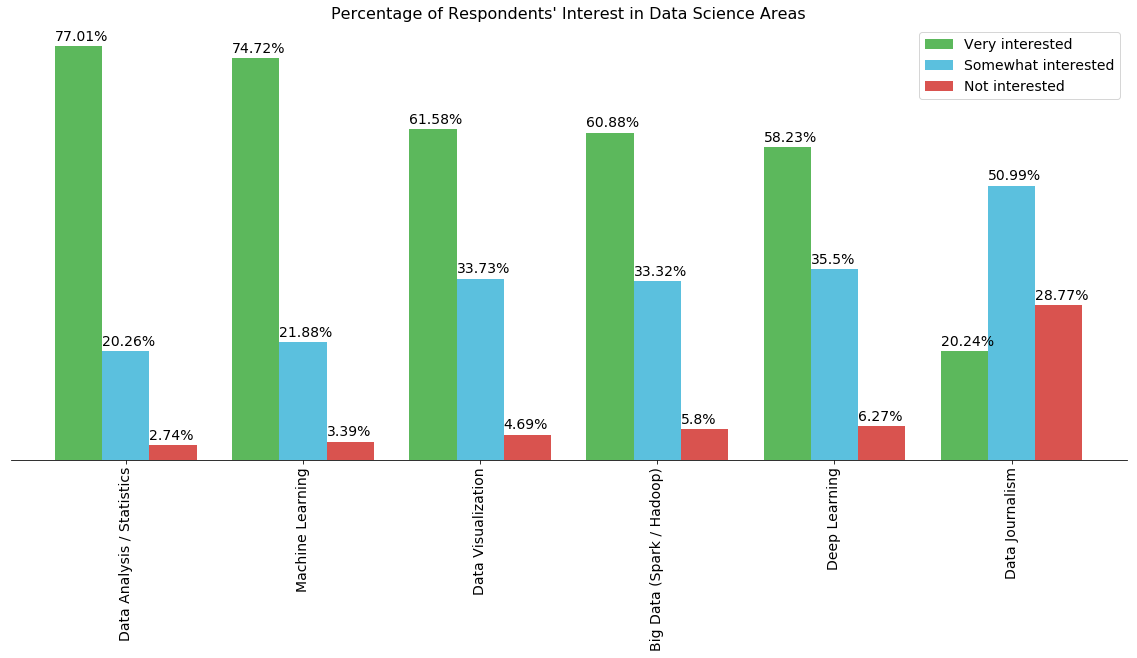

In [7]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
ax = df_new.plot(kind='bar', figsize=(20, 8), width=0.8, color=['#5cb85c','#5bc0de', '#d9534f'], edgecolor=None)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.title("Percentage of Respondents' Interest in Data Science Areas", fontsize=16) # add title to the plot
plt.legend(labels=df_new.columns,fontsize= 14)
plt.xticks(fontsize=14)
plt.yticks([])
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(('{:}'+'%').format(height), (p.get_x()+.0*width, p.get_y() + height + 1), fontsize=14)
plt.show()